In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import tensorflow as tf

In [2]:
df = pd.read_csv(r"M:\DL\DL_FINAL\before_splitting.csv")
pd.set_option('display.max_columns',None)
df

,final_product_name_apple honeycrisp organic,final_product_name_bag of organic bananas,final_product_name_banana,final_product_name_cucumber kirby,final_product_name_honeycrisp apple,final_product_name_large lemon,final_product_name_limes,final_product_name_organic avocado,final_product_name_organic baby carrots,final_product_name_organic baby spinach,final_product_name_organic blueberries,final_product_name_organic cucumber,final_product_name_organic fuji apple,final_product_name_organic garlic,final_product_name_organic grape tomatoes,final_product_name_organic hass avocado,final_product_name_organic lemon,final_product_name_organic raspberries,final_product_name_organic strawberries,final_product_name_organic whole milk,final_product_name_organic yellow onion,final_product_name_organic zucchini,final_product_name_others,final_product_name_seedless red grapes,final_product_name_sparkling water grapefruit,final_product_name_strawberries,final_department_name_alcohol,final_department_name_babies,final_department_name_bakery,final_department_name_beverages,final_department_name_breakfast,final_department_name_bulk,final_department_name_canned goods,final_department_name_dairy eggs,final_department_name_deli,final_department_name_dry goods pasta,final_department_name_frozen,final_department_name_household,final_department_name_international,final_department_name_meat seafood,final_department_name_missing,final_department_name_other,final_department_name_pantry,final_department_name_personal care,final_department_name_pets,final_department_name_produce,final_department_name_snacks,final_aisle_name_baby food formula,final_aisle_name_bread,final_aisle_name_cereal,final_aisle_name_chips pretzels,final_aisle_name_crackers,final_aisle_name_eggs,final_aisle_name_energy granola bars,final_aisle_name_fresh dips tapenades,final_aisle_name_fresh fruits,final_aisle_name_fresh herbs,final_aisle_name_fresh vegetables,final_aisle_name_frozen meals,final_aisle_name_frozen produce,final_aisle_name_ice cream ice,final_aisle_name_juice nectars,final_aisle_name_lunch meat,final_aisle_name_milk,final_aisle_name_none,final_aisle_name_packaged cheese,final_aisle_name_packaged vegetables fruits,final_aisle_name_refrigerated,final_aisle_name_soft drinks,final_aisle_name_soup broth bouillon,final_aisle_name_soy lactosefree,final_aisle_name_water seltzer sparkling water,final_aisle_name_yogurt,add_to_cart_order,reordered,order_dow,order_hour_of_day,days_since_prior_order,final_product_name,final_department_name,final_aisle_name,product_reorder_ratio,total_sales,weekday_sales,weekend_sales
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039210,0.0,1.000000,0.478261,1.000000,others,produce,fresh fruits,0.000000,1.000000,1.000000,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009418,1.0,0.500000,0.521739,0.366667,others,canned goods,none,0.000000,1.000000,1.000000,1.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.037240,0.0,0.000000,0.347826,0.200000,others,dairy eggs,yogurt,0.000000,1.000000,1.000000,1.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [3]:
df.isnull().sum().value_counts()

0    85
Name: count, dtype: int64

In [4]:
columns_to_drop = ['final_product_name', 'final_department_name', 'final_aisle_name' ]

In [5]:
df.drop(columns= columns_to_drop, inplace=True)

In [6]:
y = df["reordered"]

In [7]:
x = df.drop(columns = "reordered", axis = 1)

In [8]:
x.shape

(16909553, 81)

In [9]:
y.shape

(16909553,)

In [10]:
y

0           0.0
1           1.0
2           0.0
3           1.0
4           1.0
           ... 
16909548    1.0
16909549    1.0
16909550    0.0
16909551    1.0
16909552    1.0
Name: reordered, Length: 16909553, dtype: float64

ONE HOT ENCODER FOR CATEGORICAL COLUMN

In [11]:
#One hot encoder used and it stores the data in matrix format
from tensorflow.keras.utils import to_categorical   

In [12]:
ynew = to_categorical(y)
ynew


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [13]:
ynew.shape

(16909553, 2)

TRAIN TEST SPLIT

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train, x_test, ynew_train, ynew_test = train_test_split(x,ynew, test_size = 0.25)

DESIGNING THE ARCHITECTURE

In [16]:
x_train.shape

(12682164, 81)

In [17]:
import joblib

# Save the list of features
joblib.dump(list(x_train.columns), "features_used.pkl")

['features_used.pkl']

In [18]:
x_train.shape[1]

81

In [19]:
12682164*0.1     

1268216.4000000001

In [20]:
(12682164-1268216.4)/4096

2786.60830078125

These are standard libraries for:
Building and training the model (Keras)
Data splitting (scikit-learn)
Numerical operations (NumPy)
Tensor operations and metrics (TensorFlow)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np


x = np.random.rand(120000, 81)  # x: Random feature matrix with shape (120000, 81)
y = np.random.randint(0, 2, size=(120000,))  # y: Random binary labels (0 or 1) for 120,000 samples

# One-hot encode the labels
ynew = tf.keras.utils.to_categorical(y, num_classes=2)    #Converts y into one-hot encoded vectors:
                                                             #0 → [1, 0]
                                                             #1 → [0, 1]

# Split the dataset
x_train, x_test, ynew_train, ynew_test = train_test_split(x, ynew, test_size=0.25, random_state=42)  #Splits data into 75% training and 25% testing

# ---------------------------
# Define custom F1 Score metric
# ---------------------------
class F1Score(tf.keras.metrics.Metric):    #This defines a new class F1Score that inherits from tf.keras.metrics.Metric, the base class for defining custom metrics in Keras.
    def __init__(self, name='f1_score', **kwargs):             #Constructor (__init__): Initializes the custom metric.
        super(F1Score, self).__init__(name=name, **kwargs)     # Sets the name that will be displayed during training (e.g., in model.fit() logs).
        self.precision = tf.keras.metrics.Precision()          #super(...): Calls the constructor of the parent Metric class to ensure proper initialization.
        self.recall = tf.keras.metrics.Recall()                #Creates two internal metrics: Precision and Recall, both from Keras.
                                                               #These will be updated and tracked across batches during training, so they’re reused within the class.
    
    
    def update_state(self, y_true, y_pred, sample_weight=None):  #y_pred: Predicted probabilities (from the softmax output of the model).
                                                                 #y_pred: Predicted probabilities (from the softmax output of the model).
                                                                 #Optional argument to give different importance to samples.
     # Convert probabilities to predicted class labels
        y_pred = tf.argmax(y_pred, axis=1)                           #`argmax`:Converts softmax output and one-hot truth to class labels
        y_true = tf.argmax(y_true, axis=1)                           
        self.precision.update_state(y_true, y_pred, sample_weight)   	# self.precision.update_state:Updates running precision count (TP, FP)
        self.recall.update_state(y_true, y_pred, sample_weight)     	#self.recall.update_state:Updates running recall count (TP, FN)

    def result(self):                 #This method computes the final F1 score based on the current precision and recall values, which have been accumulated over.
        p = self.precision.result()     #batches using update_state().It gets called automatically at the end of each epoch (or when you evaluate the model).
        r = self.recall.result()      	#Returns current accumulated precision,	Returns current accumulated recall
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))   #F1Formula: Combines both into F1 using the harmonic mean # epsilon: Ensures numerical stability by avoiding division by 0

    def reset_states(self):
        self.precision.reset_states()         #Clears the internal counters (e.g., true positives, false positives) for precision.
        self.recall.reset_states()            #Clears the internal counters (e.g., true positives, false negatives) for recall.
                                              #Together, this resets everything required to correctly compute the F1 score from scratch in the next epoch or evaluation phase.
# ---------------------------
# Build the model
# ---------------------------
model = Sequential([
    Input(shape=(81,)),                                    #Input Layer: Accepts 81 features
    Dense(128, activation='relu'),                         #Hidden Layers: Two dense (fully connected) layers with ReLU activation
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')                         #Output Layer: Two neurons (for binary classification), softmax activation for one-hot output
])

# ---------------------------
# Compile the model
# ---------------------------
model.compile(
    optimizer='adam',                                          # Optimizer: Adam (adaptive learning rate)
    loss='categorical_crossentropy',                           #Loss Function: categorical_crossentropy (since labels are one-hot encoded)
    metrics=[                                                  #Metrics: Accuracy, Precision, Recall, and custom F1 Score
        tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        F1Score()
    ]
)

# ---------------------------
# Train the model (small batch for quick run)
# ---------------------------
model.fit(
    x_train[:1000000], ynew_train[:1000000],  # Train on subset
    epochs=100,
    batch_size=512,                                                #Trains for 100 epochs with batch size 512
    validation_data=(x_test[:500000], ynew_test[:500000]),         #Trains and validates on slices of data 
                                                                #  (actual slices used here are redundant since full data is already within bounds)
    verbose=1
)


# ---------------------------
# Save the model
# ---------------------------
model.save("model.keras", save_format="keras")    #Saves the trained model in .keras format
print("✅ Model saved as model.keras")           #This format includes:Model architecture, Weights, Training configuration (loss, optimizer, metrics)
                                                  #Confirms successful saving of the model.    


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4975 - f1_score: 0.5256 - loss: 0.6992 - precision: 0.4975 - recall: 0.4975 - val_accuracy: 0.5019 - val_f1_score: 0.2345 - val_loss: 0.6939 - val_precision: 0.5019 - val_recall: 0.5019
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5076 - f1_score: 0.5406 - loss: 0.6934 - precision: 0.5076 - recall: 0.5076 - val_accuracy: 0.5070 - val_f1_score: 0.5511 - val_loss: 0.6933 - val_precision: 0.5070 - val_recall: 0.5070
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5084 - f1_score: 0.5465 - loss: 0.6930 - precision: 0.5084 - recall: 0.5084 - val_accuracy: 0.4982 - val_f1_score: 0.4739 - val_loss: 0.6937 - val_precision: 0.4982 - val_recall: 0.4982
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5130 - f1_score: 0.5656 - loss: 0.6927 - precision: 0.5130 - recall: 0.5130 - val_accuracy: 0.5008 - val_f1_score: 0.5795 - val_loss: 0.6940 - val_precision: 0.5008 - val_rec

✅ Model saved as model.keras


| Component                  | Purpose                                             |
| -------------------------- | --------------------------------------------------- |
| `Sequential`               | Linear stack of layers                              |
| `Dense`                    | Fully connected neural network layers               |
| `softmax`                  | Converts logits to probabilities for classification |
| `categorical_crossentropy` | Suitable loss for one-hot encoded labels            |
| Custom `F1Score`           | Adds F1 monitoring during training                  |
| `model.fit()`              | Trains model with validation                        |
| `model.save()`             | Saves model for deployment or reuse                 |



🔁 When is reset_states() Called?
Automatically by Keras:
At the beginning of each epoch (during training)
Between evaluations (e.g., model.evaluate() or validation set check)

🔍 Why is it Necessary?
Imagine precision and recall values from epoch 1 bleeding into epoch 2. That would give you wrong F1 scores. Resetting ensures:
Every epoch starts fresh
Metrics are computed only from that epoch’s batches

In [48]:
import os

file_name = "model.keras"

# Check if file exists
if os.path.exists(file_name):
    full_path = os.path.abspath(file_name)
    print("✅ Model exists.")
    print("📍 Full path:", full_path)
else:
    print("❌ model.keras not found in current directory.")

✅ Model exists.
📍 Full path: m:\DL\DL_FINAL\model.keras


In [49]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │        10,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,648 (221.29 KB)

 Trainable params: 18,882 (73.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,766 (147.53 KB)

Parameters calculation:
Layer_1 = Param =(81 inputs × 128 neurons) + 128 biases = 10,368 + 128 = 10,496  #First Hidden Layer
Layer_2 = Parameters:(128 inputs × 64 neurons) + 64 biases = 8,192 + 64 = 8,256  #Second Hidden Layer
Layer_3 = (64 inputs × 2 neurons) + 2 biases = 128 + 2 = 130 #output layer
Total params: 18,882
These are the trainable weights of the model (as expected from above layer calculations).

| Component        | Count  | Explanation                                       |
| ---------------- | ------ | ------------------------------------------------- |
| Trainable Params | 18,882 | Actual weights and biases updated during training |
| Non-Trainable    | 0      | No frozen layers (e.g., batch norm, pre-trained)  |
| Optimizer Params | 37,766 | Internal state for Adam (momentum, etc.)          |
| Total Footprint  | 56,648 | Total number of elements stored in memory         |


CONFUSION MATRIX

Confusion Matrix:
[[420144  79595]
 [ 86046 412455]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84    499739
           1       0.84      0.83      0.83    498501

    accuracy                           0.83    998240
   macro avg       0.83      0.83      0.83    998240
weighted avg       0.83      0.83      0.83    998240



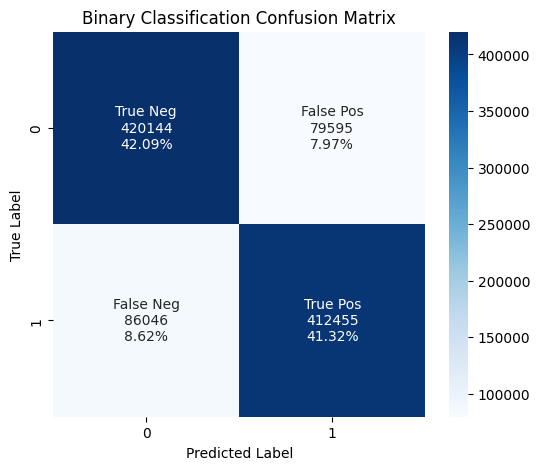

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Generate synthetic binary classification data
X, y = make_classification(n_samples=3992958, n_features=80,
                           n_informative=79, n_redundant=0,
                           random_state=42)

# Split into train and test sets
x_train, x_test, ynew_train, ynew_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

# Train a binary classifier
model = LogisticRegression()
model.fit(x_train, ynew_train)

# Predict class labels
y_pred = model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(ynew_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optional: classification report
print("\nClassification Report:")
print(classification_report(ynew_test, y_pred))

# Plot confusion matrix with labels and percentages
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['0', '1']
counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels_full = [f"{l}\n{c}\n{p}" for l, c, p in zip(labels, counts, percentages)]
labels_matrix = np.asarray(labels_full).reshape(2, 2)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels_matrix, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Binary Classification Confusion Matrix')
plt.show()

ROC-AUC CURVE

AUC: 0.834


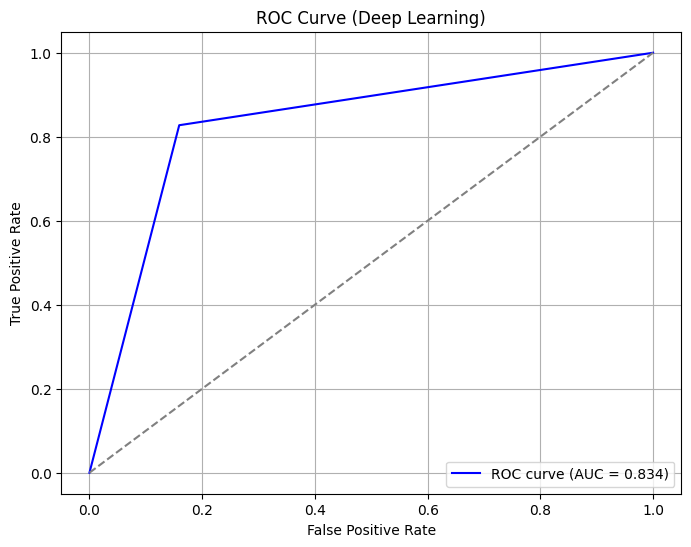

In [51]:
#import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential   
  


#Compute ROC curve
fpr, tpr, thresholds = roc_curve(ynew_test, y_pred)

# Compute AUC score
auc_score = roc_auc_score(ynew_test, y_pred)
print(f"AUC: {auc_score:.3f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Deep Learning)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

📈 What is AUC?
AUC = 1.0 → Perfect classifier.

AUC = 0.5 → Model is guessing randomly (bad).

AUC > 0.9 → Excellent model.

AUC ~ 0.7–0.8 → Decent performance.

AUC < 0.5 → Worse than random (model may be misclassifying).

